# 03 Feature Engineering - Energy Prediction<a id=''></a>

## 1. Introduction <a id='1'></a>

The main task for the notebook is to perform feature engineering for the cleaned and merged datatset.

## 2. Feature Engineering <a id='2'></a>

### 2.1 Imports <a id='2.1'></a>

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import matplotlib as mpl
import matplotlib.pylab as pylab
import matplotlib.patches as mpatches
from matplotlib.gridspec import GridSpec

# Metrics & Models
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree, metrics
%matplotlib inline

import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime

In [68]:
path = '../data/'
file_name = 'mlmodeldata.csv'
full_path = path + file_name
df = pd.read_csv(full_path, index_col=[0])

In [69]:
df.head()

,building_id,loc_id,subUsage,sqm,Unnamed: 0_x,index,timestamp,meter_reading,Unnamed: 0_y,site_id,airTemperature,dewTemperature,seaLvlPressure,windDirection,windSpeed
0,789,7.0,College Classroom,6000.0,0,0,2016-01-01 00:00:00,516.43,17544,Ottawa,-2.2,-3.6,1014.5,270.0,2.1
1,789,7.0,College Classroom,6000.0,1,1,2016-01-01 01:00:00,519.40,17545,Ottawa,-2.3,-3.8,1014.5,260.0,2.1
2,789,7.0,College Classroom,6000.0,2,2,2016-01-01 02:00:00,501.68,17546,Ottawa,-2.8,-4.0,1014.0,260.0,1.5
3,789,7.0,College Classroom,6000.0,3,3,2016-01-01 03:00:00,507.87,17547,Ottawa,-3.0,-3.8,1014.0,260.0,1.5
4,789,7.0,College Classroom,6000.0,4,4,2016-01-01 04:00:00,509.45,17548,Ottawa,-3.3,-3.8,1013.5,230.0,1.0


In [70]:
# columns to be removed
columns = ['loc_id', 'Unnamed: 0_x', 'index', 'Unnamed: 0_y']

df = df.drop(columns=columns)

In [71]:
df.head()

,building_id,subUsage,sqm,timestamp,meter_reading,site_id,airTemperature,dewTemperature,seaLvlPressure,windDirection,windSpeed
0,789,College Classroom,6000.0,2016-01-01 00:00:00,516.43,Ottawa,-2.2,-3.6,1014.5,270.0,2.1
1,789,College Classroom,6000.0,2016-01-01 01:00:00,519.40,Ottawa,-2.3,-3.8,1014.5,260.0,2.1
2,789,College Classroom,6000.0,2016-01-01 02:00:00,501.68,Ottawa,-2.8,-4.0,1014.0,260.0,1.5
3,789,College Classroom,6000.0,2016-01-01 03:00:00,507.87,Ottawa,-3.0,-3.8,1014.0,260.0,1.5
4,789,College Classroom,6000.0,2016-01-01 04:00:00,509.45,Ottawa,-3.3,-3.8,1013.5,230.0,1.0


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349756 entries, 0 to 349755
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   building_id     349756 non-null  int64  
 1   subUsage        349756 non-null  object 
 2   sqm             349756 non-null  float64
 3   timestamp       349756 non-null  object 
 4   meter_reading   349756 non-null  float64
 5   site_id         349756 non-null  object 
 6   airTemperature  336171 non-null  float64
 7   dewTemperature  335252 non-null  float64
 8   seaLvlPressure  335492 non-null  float64
 9   windDirection   336171 non-null  float64
 10  windSpeed       336171 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 32.0+ MB


In [74]:
# fill airTemperature,dewTemperature,seaLvlPressure, windDirection, windSpeed missing values with interpolation
df.airTemperature.interpolate(method='linear', inplace=True)
df.dewTemperature.interpolate(method='linear', inplace=True)
df.seaLvlPressure.interpolate(method='linear', inplace=True)
df.windDirection.interpolate(method='linear', inplace=True)
df.windSpeed.interpolate(method='linear', inplace=True)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349756 entries, 0 to 349755
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   building_id     349756 non-null  int64  
 1   subUsage        349756 non-null  object 
 2   sqm             349756 non-null  float64
 3   timestamp       349756 non-null  object 
 4   meter_reading   349756 non-null  float64
 5   site_id         349756 non-null  object 
 6   airTemperature  349756 non-null  float64
 7   dewTemperature  349756 non-null  float64
 8   seaLvlPressure  349756 non-null  float64
 9   windDirection   349756 non-null  float64
 10  windSpeed       349756 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 32.0+ MB


In [76]:
df = df[df['meter_reading'] != 0]

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 341735 entries, 0 to 348505
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   building_id     341735 non-null  int64  
 1   subUsage        341735 non-null  object 
 2   sqm             341735 non-null  float64
 3   timestamp       341735 non-null  object 
 4   meter_reading   341735 non-null  float64
 5   site_id         341735 non-null  object 
 6   airTemperature  341735 non-null  float64
 7   dewTemperature  341735 non-null  float64
 8   seaLvlPressure  341735 non-null  float64
 9   windDirection   341735 non-null  float64
 10  windSpeed       341735 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 31.3+ MB


In [90]:
# Add features - timestamp features
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['month'] = df.timestamp.dt.month
df['weekday'] = df.timestamp.dt.weekday
df['hour'] = df.timestamp.dt.hour
df['year'] = df.timestamp.dt.year
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 341735 entries, 0 to 348505
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   building_id     341735 non-null  int64         
 1   sqm             341735 non-null  float64       
 2   subUsage        341735 non-null  object        
 3   airTemperature  341735 non-null  float64       
 4   windSpeed       341735 non-null  float64       
 5   month           341735 non-null  int64         
 6   weekday         341735 non-null  int64         
 7   hour            341735 non-null  int64         
 8   year            341735 non-null  int64         
 9   timestamp       341735 non-null  datetime64[ns]
 10  meter_reading   341735 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(5), object(1)
memory usage: 31.3+ MB


<AxesSubplot:>

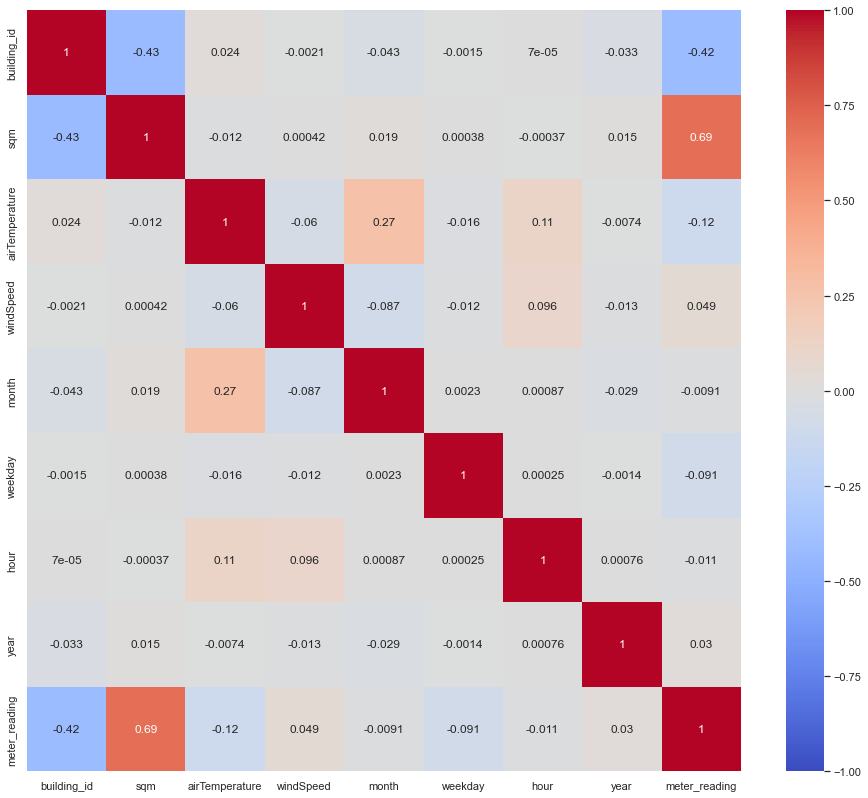

In [91]:
sns.set(rc={'figure.figsize':(16,14)})
sns.heatmap(df.corr(), cmap="coolwarm", vmin=-1, vmax=1, annot=True)

### 2.2 Feature Selection <a id='2.2'></a>

The following features will be selected:
* sqm (building size)
* timestamp
* subUsage (use of building, category)
* meter_reading (reading of meter)
* airTemperature (temperature)
* WindSpeed (speed of wind)
* month
* weekday
* hour

In [92]:
# selected features
columns = ['building_id', 'sqm', 'subUsage', 'airTemperature', 'windSpeed', 'month', 'weekday', 'hour', 'year', 'timestamp', 'meter_reading']
df = df[columns]

In [93]:
df.head()

,building_id,sqm,subUsage,airTemperature,windSpeed,month,weekday,hour,year,timestamp,meter_reading
0,789,6000.0,College Classroom,-2.2,2.1,1,4,0,2016,2016-01-01 00:00:00,516.43
1,789,6000.0,College Classroom,-2.3,2.1,1,4,1,2016,2016-01-01 01:00:00,519.40
2,789,6000.0,College Classroom,-2.8,1.5,1,4,2,2016,2016-01-01 02:00:00,501.68
3,789,6000.0,College Classroom,-3.0,1.5,1,4,3,2016,2016-01-01 03:00:00,507.87
4,789,6000.0,College Classroom,-3.3,1.0,1,4,4,2016,2016-01-01 04:00:00,509.45


In [94]:
df.shape

(341735, 11)

In [95]:
df.describe()

,building_id,sqm,airTemperature,windSpeed,month,weekday,hour,year,meter_reading
count,341735.000000,341735.000000,341735.000000,341735.000000,341735.000000,341735.000000,341735.000000,341735.000000,341735.000000
mean,851.364964,25238.490536,7.624755,3.445009,6.446960,3.002089,11.501637,2016.492343,2767.385412
std,99.519570,19823.883431,12.015891,2.002194,3.419344,1.999548,6.918356,0.499942,3060.092556
min,789.000000,6000.000000,-28.800000,0.000000,1.000000,0.000000,0.000000,2016.000000,0.110000
25%,793.000000,8659.100000,-0.900000,2.100000,3.000000,1.000000,6.000000,2016.000000,499.686000
50%,798.000000,16999.900000,8.100000,3.100000,6.000000,3.000000,12.000000,2016.000000,1405.090000
75%,803.000000,37999.900000,17.600000,4.600000,9.000000,5.000000,17.000000,2017.000000,4428.840000
max,1032.000000,70999.900000,33.900000,13.400000,12.000000,6.000000,23.000000,2017.000000,21507.570000


### 2.3 Data Splitting <a id='2.3'></a>

In [96]:
df.columns

Index(['building_id', 'sqm', 'subUsage', 'airTemperature', 'windSpeed',
       'month', 'weekday', 'hour', 'year', 'timestamp', 'meter_reading'],
      dtype='object')

In [100]:
df = df[df['building_id'] == 789]

In [109]:
# list of features to be incldued in X
features = ['building_id','sqm', 'subUsage', 'airTemperature', 'windSpeed', 'month', 'weekday',
       'hour', 'year', 'timestamp']


# create X based on features
X = df[features]
X = pd.get_dummies(X, prefix_sep='_', drop_first=True)
X.set_index()
X.info()

# X.reset_index('timestamp', inplace=True)
# # # create y
# # y = df.meter_reading

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17255 entries, 0 to 183315
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   building_id     17255 non-null  int64         
 1   sqm             17255 non-null  float64       
 2   airTemperature  17255 non-null  float64       
 3   windSpeed       17255 non-null  float64       
 4   month           17255 non-null  int64         
 5   weekday         17255 non-null  int64         
 6   hour            17255 non-null  int64         
 7   year            17255 non-null  int64         
 8   timestamp       17255 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 1.3 MB


In [104]:
X.head()

,building_id,sqm,airTemperature,windSpeed,month,weekday,hour,year,timestamp
0,789,6000.0,-2.2,2.1,1,4,0,2016,2016-01-01 00:00:00
1,789,6000.0,-2.3,2.1,1,4,1,2016,2016-01-01 01:00:00
2,789,6000.0,-2.8,1.5,1,4,2,2016,2016-01-01 02:00:00
3,789,6000.0,-3.0,1.5,1,4,3,2016,2016-01-01 03:00:00
4,789,6000.0,-3.3,1.0,1,4,4,2016,2016-01-01 04:00:00


In [99]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 246)